In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
data = pd.DataFrame(diabetes.data, columns=[diabetes.feature_names])
target = pd.DataFrame(diabetes.target)

In [5]:
X = diabetes.data[:, np.newaxis, 2]
y = np.array(target)

In [6]:
target.head(5)

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[975.27698313]]
lr.intercept_: [152.07653297]


In [9]:
y_pred = lr.predict(X_test)
print("Coefficient of Determination R Squared: %.2f" % r2_score(y_test, y_pred))

Coefficient of Determination R Squared: 0.32


<function matplotlib.pyplot.show(close=None, block=None)>

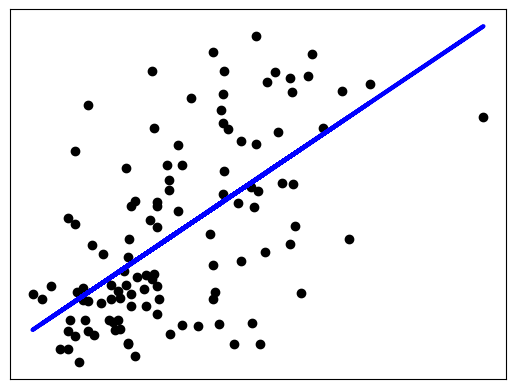

In [10]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show

# Tasks

1) Plot below

2) a) the coefficients are: 
    y-intercpet = 152
    gradient = 975
this gives a model of $y=975{\times}BMI+152$

    b) the ${R^2}$ = 0.32, this shows that the value y is explained by 32% of the model.

    c) This is not a good model as the ${R^2}$ value is quite low.

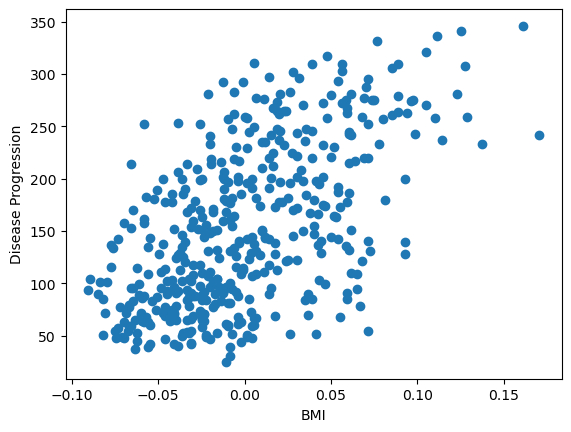

In [11]:
plt.plot(data['bmi'],target,'o')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.show()


In [12]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

In [13]:
def load_extended_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2,:], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    
    
    X = MinMaxScaler().fit_transform(data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, target

In [14]:
X, y = load_extended_boston()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# Tasks

1) a) 0.61

b) The training set is used to create the model the testing set is a seperate set of values that then tests the accuracy of the model in a real way.

c) The model shows a test score lower than that of the training score this is likely due to overfitting. So the model may be too good a fit for the training data. 

In [16]:
from sklearn.linear_model import Ridge

In [17]:
ridge = Ridge(alpha=1.0).fit(X_train,y_train)

print("Training set score: {:2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:2f}".format(lr.score(X_test,y_test)))
print("Ridge Training set score: {:2f}".format(ridge.score(X_train,y_train)))
print("Ridge test set score: {:2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.952052
Test set score: 0.607472
Ridge Training set score: 0.885797
Ridge test set score: 0.752768


In [18]:
import seaborn as sns

In [19]:
sns.set(style="ticks")

In [20]:
data.head(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646


In [59]:
columns_required = ["age","sex","bmi","bp"]
test_data = data[columns_required].copy()

test_data

,age,sex,bmi,bp
0,0.038076,0.050680,0.061696,0.021872
1,-0.001882,-0.044642,-0.051474,-0.026328
2,0.085299,0.050680,0.044451,-0.005670
3,-0.089063,-0.044642,-0.011595,-0.036656
4,0.005383,-0.044642,-0.036385,0.021872
...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744
438,-0.005515,0.050680,-0.015906,-0.067642
439,0.041708,0.050680,-0.015906,0.017293
440,-0.045472,-0.044642,0.039062,0.001215


In [27]:
test_data.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
dtype: object

In [37]:
test_data.shape

(442, 4)

In [63]:
sns.pairplot(data=test_data,x=test_data.index)
plt.show()

TypeError: pairplot() got an unexpected keyword argument 'x'

In [35]:
X,y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [69]:
lr = LinearRegression().fit(X_train, y_train)


In [70]:
ridge = Ridge(alpha=1.5).fit(X_train, y_train)


In [71]:

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test))
print("Ridge Training set score: {:.2f}".format(ridge.score(X_train, y_train))
print("Ridge Test set score: {:.2f}".format(ridge.score(X_test, y_test))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1164540399.py, line 2)

# Questions

1) Not done

2) Not done

3) I would remove the variables that show a correlation.

4) a) yes, the lr model and the ridge model have different coefficients as the ridge model limits the sum of the coefficients to avoid overfitting and improve accuracy on the test data

b) The alpha parameter changes the constraint on the coefficients for the regression model, changing the accuracy.

c) 

In [78]:
pip install yellowbrick


  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/282.6 kB 2.0 MB/s eta 0:00:01
   ------------------------------------ --- 256.0/282.6 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 2.2 MB/s eta 0:00:00


In [79]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

NameError: name 'visualizer' is not defined